# **Cost optimisation for 7 days with growth factor **

In [ ]:
!pip install docplex
!pip install cplex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 635.6/635.6 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for docplex: filename=docplex-2.27.239-py3-none-any.whl size=674503 sha256=9fdfdb2879ddf8cbf6b99dbee41dee3992ee125ed19d3111001d26ad7439c751
  Stored in directory: /root/.cache/pip/wheels/62/7c/db/cef9425e1cedbf45621545097eaaeed5efe07005bd8229dd74
Successfully built docplex
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.2/44.2 MB 21.5 MB/s eta 0:00:00


In [ ]:
from docplex.mp.model import Model
import cplex
model = Model("Instance_Optimization")

In [ ]:

instances_needed = [10, 12, 8, 15, 9, 11, 7]

UPDATE DATA FN

In [ ]:
def update_data(instances_needed):
    Updated_instances_needed = [ int(instances_needed[x]+10**(0.05*(x+1))) for x in range(len(instances_needed))]
    return Updated_instances_needed
Updated_instances_needed=update_data(instances_needed)
print(Updated_instances_needed)


[11, 13, 9, 16, 10, 12, 9]


can do predictions for future data based on historic data


In [ ]:

C = 10  # Cost of instances
d = 0.2

In [ ]:

Xr = model.continuous_var(name="Reserved_Instances")
Xod = model.continuous_var_list(keys=range(7), name="On_Demand_Instances")

In [ ]:
#d = 0.001 * Xr - 0.001 #(constraint d <1 always)

In [ ]:

total_cost = 28 * Xr * C * (1 - d) + 4 * sum(Xod) * C
model.minimize(total_cost)

constraints


In [ ]:

for i, n in enumerate(instances_needed):
    model.add_constraint(Xod[i] + Xr >= n, ctname=f"instances_needed_{i}")

In [ ]:

total_cost = 28 * Xr * C * (1 - d) + 4 * sum(Xod) * C
max_cost = 10000  # Maximum allowable cost
model.add_constraint(total_cost <= max_cost, ctname="budget_constraint")

docplex.mp.LinearConstraint[budget_constraint](224Reserved_Instances+40On_Demand_Instances_0+40On_Demand_Instances_1+40On_Demand_Instances_2+40On_Demand_Instances_3+40On_Demand_Instances_4+40On_Demand_Instances_5+40On_Demand_Instances_6,LE,10000)

In [ ]:
solution = model.solve()

In [ ]:

if solution:
    print("Optimal Solution Found:")
    print(f"Total Cost: {solution.objective_value}")
    print(f"Reserved Instances: {solution[Xr]}")
    for i, day in enumerate(Xod):
        print(f"On-Demand Instances for Day {i+1}: {solution.get_value(day)}")
else:
    print("No solution found.")


Optimal Solution Found:
Total Cost: 2472.0
Reserved Instances: 8.0
On-Demand Instances for Day 1: 2.0
On-Demand Instances for Day 2: 4.0
On-Demand Instances for Day 3: 0
On-Demand Instances for Day 4: 7.0
On-Demand Instances for Day 5: 1.0
On-Demand Instances for Day 6: 3.0
On-Demand Instances for Day 7: 0


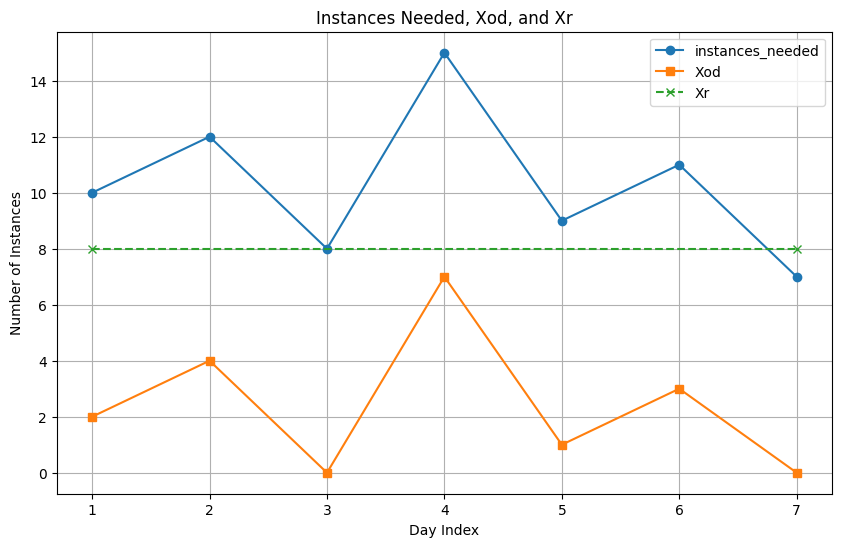

In [ ]:
import matplotlib.pyplot as plt


Xod_values = [solution.get_value(Xod[i]) for i in range(7)]
Xr_value = solution.get_value(Xr)


plt.figure(figsize=(10, 6))

plt.plot(range(1, 8), instances_needed, marker='o', label='instances_needed')


plt.plot(range(1, 8), Xod_values, marker='s', label='Xod')

plt.plot([1, 7], [Xr_value, Xr_value], linestyle='--', marker='x', label='Xr')


plt.xlabel('Day Index')
plt.ylabel('Number of Instances')
plt.title('Instances Needed, Xod, and Xr')
plt.xticks(range(1, 8))
plt.legend()
plt.grid(True)

plt.show()


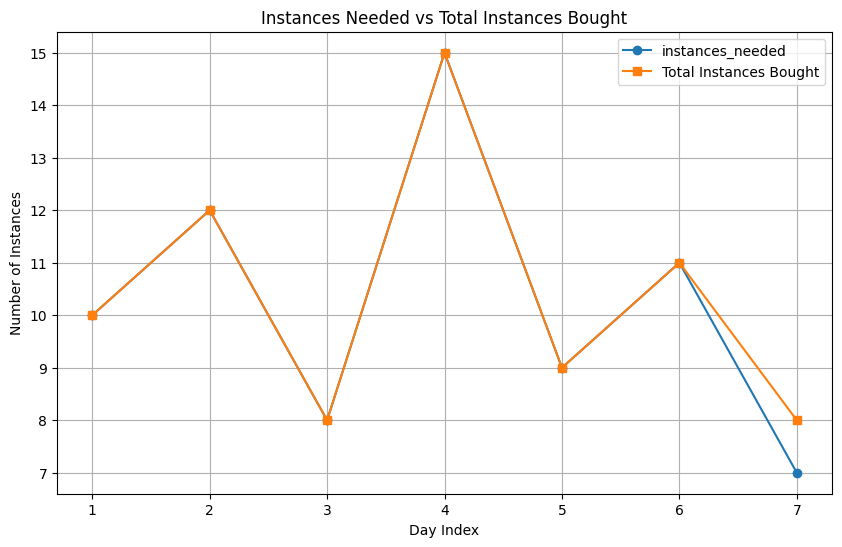

In [ ]:
import matplotlib.pyplot as plt


Xod_values = [solution.get_value(Xod[i]) for i in range(7)]
Xr_value = solution.get_value(Xr)

total_instances_bought = [Xod_values[i] + Xr_value for i in range(7)]


plt.figure(figsize=(10, 6))


plt.plot(range(1, 8), instances_needed, marker='o', label='instances_needed')

plt.plot(range(1, 8), total_instances_bought, marker='s', label='Total Instances Bought')


plt.xlabel('Day Index')
plt.ylabel('Number of Instances')
plt.title('Instances Needed vs Total Instances Bought')
plt.xticks(range(1, 8))
plt.legend()
plt.grid(True)


plt.show()

# **DATA UPDATE Function**

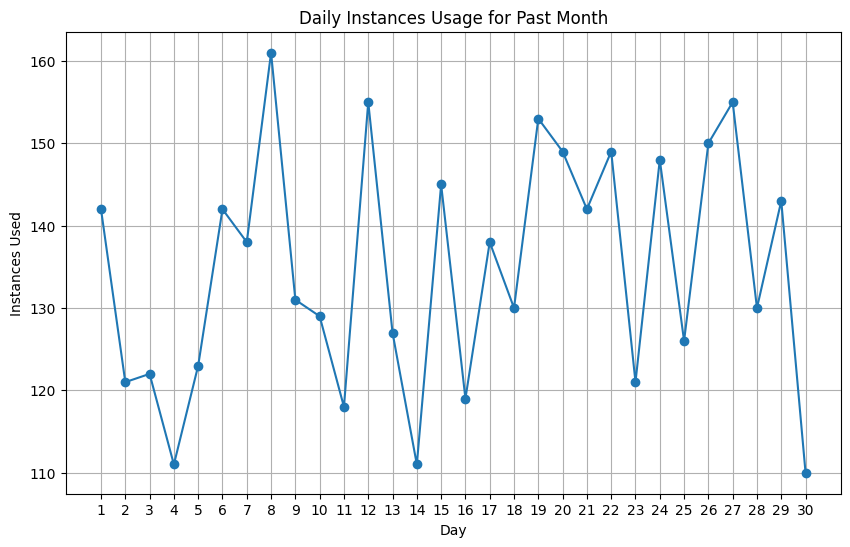

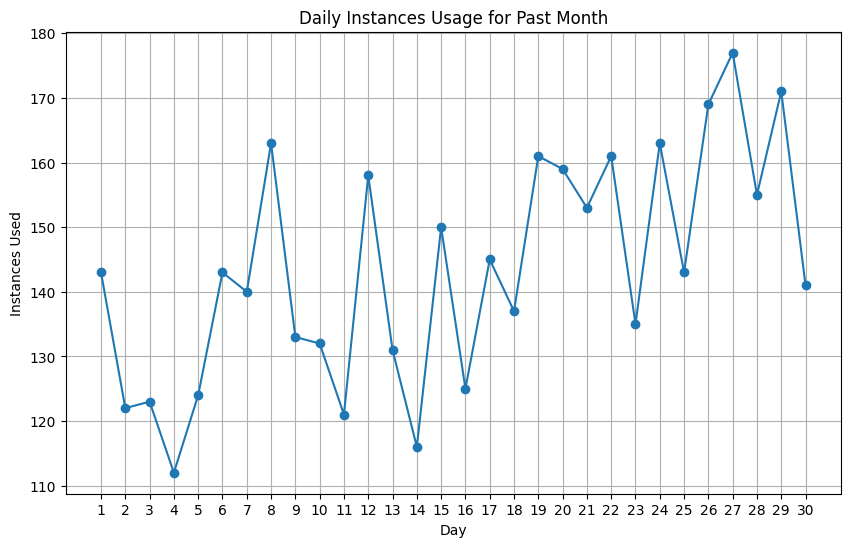

In [ ]:
import random
import matplotlib.pyplot as plt
import numpy as np

def generate_past_month_data(days, variability):

    data = [random.randint(120 - variability, 150 + variability) for _ in range(days)]
    return data

def plot_daily_usage(data):

    days = len(data)
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(1, days + 1), data, marker='o')
    plt.xlabel('Day')
    plt.ylabel('Instances Used')
    plt.title('Daily Instances Usage for Past Month')
    plt.grid(True)
    plt.xticks(np.arange(1, days + 1))
    plt.show()

# Generate data for past 30 days with variability of 20
data = generate_past_month_data(30, 12)
plot_daily_usage(data)
data = update_data(data)

plot_daily_usage(data)

# MODEL for Monthly DATA

In [ ]:

mdl = Model("monthly_Optimization")

In [ ]:
print(mdl)


docplex.mp.Model['monthly_Optimization']


In [ ]:
C_m = 10
d_m= 0.2

In [ ]:
Xrm = mdl.continuous_var(name="Reserved_Instances_monthly")
Xodm = mdl.continuous_var_list(keys=range(30), name="On_Demand_Instances_monthly")

In [ ]:
print(len(data))

30


In [ ]:
total_cost = 30 * Xrm * C_m * (1 - d_m) + sum(Xodm) * C_m
mdl.minimize(total_cost)

In [ ]:

for i, n in enumerate(data):
    mdl.add_constraint(Xodm[i] + Xrm >= n, ctname=f"data_{i}")

In [ ]:
total_space = Xrm*10 + 8*mdl.sum(Xodm)
max_space = 5000  # Maximum allowable space
mdl.add_constraint(total_space <= max_space, ctname="space_constraint")



docplex.mp.LinearConstraint[space_constraint](10Reserved_Instances_monthly+8On_Demand_Instances_monthly_0+8On_Demand_Instances_monthly_1+8On_Demand_Instances_monthly_2+8On_Demand_Instances_monthly_3+8On_Demand_Instances_monthly_4+8On_Demand_Instances_monthly_5+8On_Demand_Instances_monthly_6+8On_Demand_Instances_monthly_7+8On_Demand_Instances_monthly_8+8On_Demand_Instances_monthly_9+8On_Demand_Instances_monthly_10+8On_Demand_Instances_monthly_11+8On_Demand_Instances_monthly_12+8On_Demand_Instances_monthly_13+8On_Demand_Instances_monthly_14+8On_Demand_Instances_monthly_15+8On_Demand_Instances_monthly_16+8On_Demand_Instances_monthly_17+8On_Demand_Instances_monthly_18+8On_Demand_Instances_monthly_19+8On_Demand_Instances_monthly_20+8On_Demand_Instances_monthly_21+8On_Demand_Instances_monthly_22+8On_Demand_Instances_monthly_23+8On_Demand_Instances_monthly_24+8On_Demand_Instances_monthly_25+8On_Demand_Instances_monthly_26+8On_Demand_Instances_monthly_27+8On_Demand_Instances_monthly_28+8On_Dem

In [ ]:

total_cost = 28 * Xrm * C_m * (1 - d_m) + 4 * sum(Xodm) * C_m
max_cost = 50000  # Maximum allowable cost
mdl.add_constraint(total_cost <= max_cost, ctname="budget_constraint")

docplex.mp.LinearConstraint[budget_constraint](224Reserved_Instances_monthly+40On_Demand_Instances_monthly_0+40On_Demand_Instances_monthly_1+40On_Demand_Instances_monthly_2+40On_Demand_Instances_monthly_3+40On_Demand_Instances_monthly_4+40On_Demand_Instances_monthly_5+40On_Demand_Instances_monthly_6+40On_Demand_Instances_monthly_7+40On_Demand_Instances_monthly_8+40On_Demand_Instances_monthly_9+40On_Demand_Instances_monthly_10+40On_Demand_Instances_monthly_11+40On_Demand_Instances_monthly_12+40On_Demand_Instances_monthly_13+40On_Demand_Instances_monthly_14+40On_Demand_Instances_monthly_15+40On_Demand_Instances_monthly_16+40On_Demand_Instances_monthly_17+40On_Demand_Instances_monthly_18+40On_Demand_Instances_monthly_19+40On_Demand_Instances_monthly_20+40On_Demand_Instances_monthly_21+40On_Demand_Instances_monthly_22+40On_Demand_Instances_monthly_23+40On_Demand_Instances_monthly_24+40On_Demand_Instances_monthly_25+40On_Demand_Instances_monthly_26+40On_Demand_Instances_monthly_27+40On_Dema

In [ ]:
solution = mdl.solve()
if solution:
    print("Optimal Solution Found:")
    print(f"Total Cost: {solution.objective_value}")
    print(f"Reserved Instances: {solution[Xrm]}")
    for i, day in enumerate(Xodm):
        print(f"On-Demand Instances for Day {i+1}: {solution.get_value(day)}")
else:
    print("No solution found.")


Optimal Solution Found:
Total Cost: 35934.8275862069
Reserved Instances: 130.48275862068965
On-Demand Instances for Day 1: 12.517241379310349
On-Demand Instances for Day 2: 0
On-Demand Instances for Day 3: 0
On-Demand Instances for Day 4: 0
On-Demand Instances for Day 5: 0
On-Demand Instances for Day 6: 12.517241379310349
On-Demand Instances for Day 7: 9.517241379310349
On-Demand Instances for Day 8: 32.51724137931035
On-Demand Instances for Day 9: 2.5172413793103487
On-Demand Instances for Day 10: 1.5172413793103487
On-Demand Instances for Day 11: 0
On-Demand Instances for Day 12: 27.51724137931035
On-Demand Instances for Day 13: 0.5172413793103487
On-Demand Instances for Day 14: 0
On-Demand Instances for Day 15: 19.51724137931035
On-Demand Instances for Day 16: 0
On-Demand Instances for Day 17: 14.517241379310349
On-Demand Instances for Day 18: 6.517241379310349
On-Demand Instances for Day 19: 30.51724137931035
On-Demand Instances for Day 20: 28.51724137931035
On-Demand Instances for

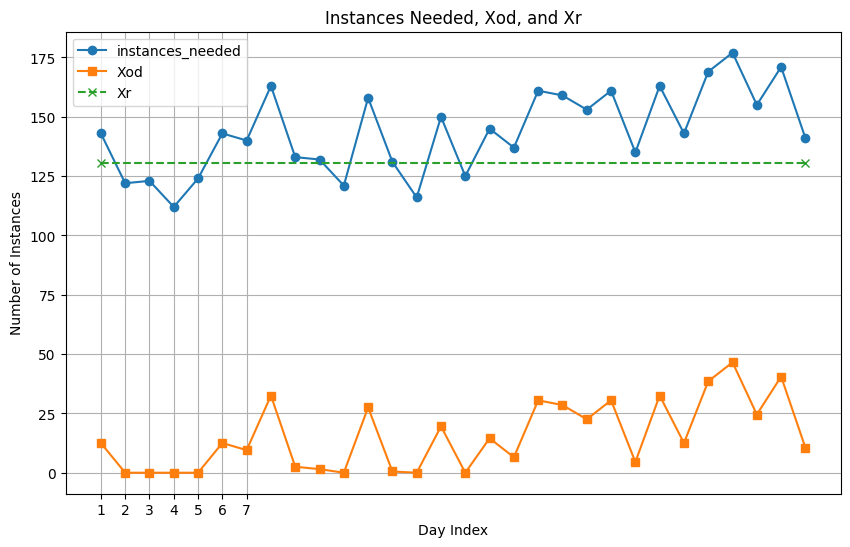

In [ ]:
import matplotlib.pyplot as plt


Xod_values = [solution.get_value(Xodm[i]) for i in range(30)]
Xr_value = solution.get_value(Xrm)


plt.figure(figsize=(10, 6))


plt.plot(range(1, 31), data, marker='o', label='instances_needed')

# Plot Xod
plt.plot(range(1, 31), Xod_values, marker='s', label='Xod')

# Plot Xr
plt.plot([1, 30], [Xr_value, Xr_value], linestyle='--', marker='x', label='Xr')


plt.xlabel('Day Index')
plt.ylabel('Number of Instances')
plt.title('Instances Needed, Xod, and Xr')
plt.xticks(range(1, 8))
plt.legend()
plt.grid(True)

# Show plot
plt.show()


# Variable **discount**

In [ ]:
def modesol(d_m):


    mdl = Model("monthly_Optimization")
    C_m = 10
    d_m= 0.2
    Xrm = mdl.continuous_var(name="Reserved_Instances_monthly")
    Xodm = mdl.continuous_var_list(keys=range(30), name="On_Demand_Instances_monthly")

    total_cost = 30 * Xrm * C_m * (1 - d_m) + sum(Xodm) * C_m
    mdl.minimize(total_cost)


    for i, n in enumerate(data):
        mdl.add_constraint(Xodm[i] + Xrm >= n, ctname=f"data_{i}")
    total_space = Xrm*10 + 8*mdl.sum(Xodm)
    max_space = 5000  # Maximum allowable space
    mdl.add_constraint(total_space <= max_space, ctname="space_constraint")


    total_cost = 28 * Xrm * C_m * (1 - d_m) + 4 * sum(Xodm) * C_m
    max_cost = 50000  # Maximum allowable cost
    mdl.add_constraint(total_cost <= max_cost, ctname="budget_constraint")
    solution = mdl.solve()
    if solution:


        X_odm=sum( [solution.get_value(Xodm[i]) for i in range(30)])

        Total_cost= 30*solution[Xrm]*C_m+(1-d_m) +sum( [solution.get_value(Xodm[i]) for i in range(30)])*C_m

    else:
        print("No solution found.")


    return solution[Xrm] ,Total_cost,X_odm


while True:
    d_m = 0.4
    d_m1=0.4
    cost_1=modesol(d_m)[1]
    print("cost111",cost_1)
    on_demand=modesol(d_m)[2]
    XRM1=modesol(d_m)[0]
    print("XRM1",XRM1)
    if modesol(d_m)[0] > 150:

        break

    else:
        d_m = 0.3
        d_m2=0.3
        cost_2=modesol(d_m)[1]
        print("cost2",cost_2)
        on_demand2=modesol(d_m)[2]
        XRM2=modesol(d_m)[0]

        if modesol(d_m)[0] > 100:
           if (((150-modesol(d_m)[0])*C_m*(1-d_m))*30 + modesol(d_m)[1] >= 30*XRM1*C_m*(1-d_m1)+(150-modesol(d_m)[0])*C_m*(1-d_m1)*30 + (on_demand-150+modesol(d_m)[0])*C_m):
              d_m=0.4
           break
        else:
            d_m = 0.2
            if (((150-modesol(d_m)[0])*C_m*(1-d_m))*30 + modesol(d_m)[1] >= 30*XRM1*C_m*(1-d_m2)+(100-modesol(d_m)[0])*C_m*(1-d_m2)*30 + (on_demand-100 + modesol(d_m)[0])*C_m):
                d_m=0.3
                break
            break

print(d_m)









cost111 43764.59310344828
XRM1 130.48275862068965
cost2 43764.59310344828
0.4


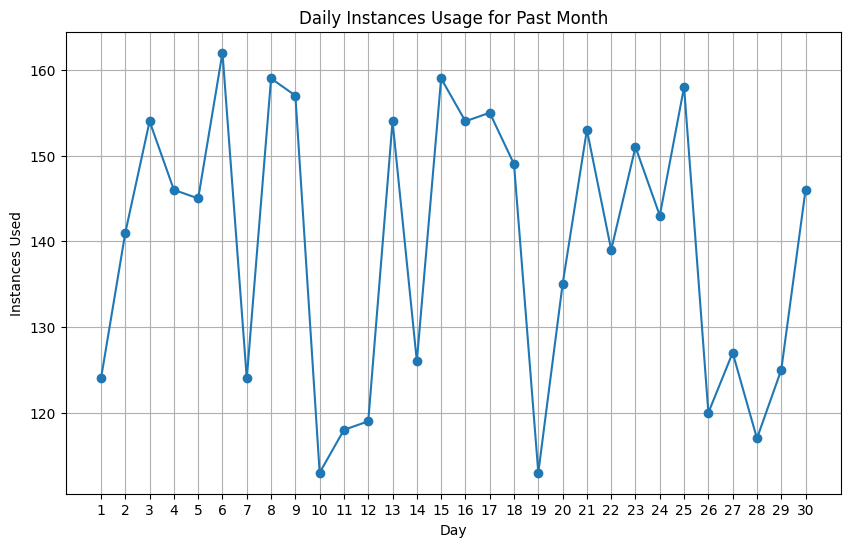

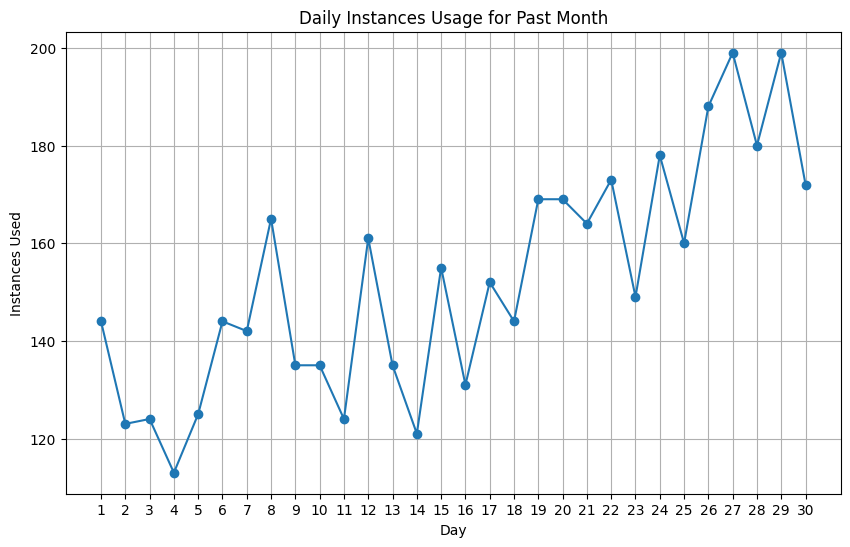

In [ ]:
data_s = generate_past_month_data(30, 12)
plot_daily_usage(data_s)
data_s = update_data(data)

plot_daily_usage(data_s)

## Monthly COST AND SPACE OPTIMISATION MODEL

In [ ]:
from docplex.mp.model import Model

C_m = 10
d_m = 0.2
w = 0.6  # Weight parameter for trade-off between cost and space

mdl_space = Model("monthlyspacecost_Optimization")

Xrms = mdl_space.continuous_var(name="Reserved_Instances_monthly")
Xodms = mdl_space.continuous_var_list(keys=range(30), name="On_Demand_Instances_monthly")

total_cost = 30 * Xrms * C_m * (1 - d_m) + mdl_space.sum(Xodms) * C_m
total_space = Xrms*10 + mdl_space.sum(Xodms)*8
mdl_space.minimize(w * total_cost + (1 - w) * total_space)

# Assuming you have defined 'data' before this loop
for i, n in enumerate(data_s):
    mdl_space.add_constraint(Xodms[i] + Xrms >= n, ctname=f"data_s_{i}")

sol = mdl_space.solve()

if sol:
    print("Optimal Solution Found:")
    print(f"Total Cost: {sol.objective_value}")
    print(f"Reserved Instances: {sol[Xrms]}")
    total_space_cost = sol[Xrms] * C_m * (1 - d_m) + sum( [sol.get_value(Xodms[i]) for i in range(30)]) * C_m
    print(f"Total Space Cost: {total_space_cost}")
    Space_used= sol[Xrms]*10+sum( [sol.get_value(Xodms[i]) for i in range(30)]) * 8
    print(f"Total Space used: {Space_used}" )
    for i, day in enumerate(Xodms):
        print(f"On-Demand Instances for Day {i+1}: {sol.get_value(day)}")
else:
    print("No solution found.")


Optimal Solution Found:
Total Cost: 25258.8
Reserved Instances: 144.0
Total Space Cost: 5442.0
Total Space used: 4872.0
On-Demand Instances for Day 1: 0
On-Demand Instances for Day 2: 0
On-Demand Instances for Day 3: 0
On-Demand Instances for Day 4: 0
On-Demand Instances for Day 5: 0
On-Demand Instances for Day 6: 0
On-Demand Instances for Day 7: 0
On-Demand Instances for Day 8: 21.0
On-Demand Instances for Day 9: 0
On-Demand Instances for Day 10: 0
On-Demand Instances for Day 11: 0
On-Demand Instances for Day 12: 17.0
On-Demand Instances for Day 13: 0
On-Demand Instances for Day 14: 0
On-Demand Instances for Day 15: 11.0
On-Demand Instances for Day 16: 0
On-Demand Instances for Day 17: 8.0
On-Demand Instances for Day 18: 0
On-Demand Instances for Day 19: 25.0
On-Demand Instances for Day 20: 25.0
On-Demand Instances for Day 21: 20.0
On-Demand Instances for Day 22: 29.0
On-Demand Instances for Day 23: 5.0
On-Demand Instances for Day 24: 34.0
On-Demand Instances for Day 25: 16.0
On-Deman

plottings


[178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 178.0, 186.0, 194.79999999999998, 179.59999999999997, 194.8, 178.0]


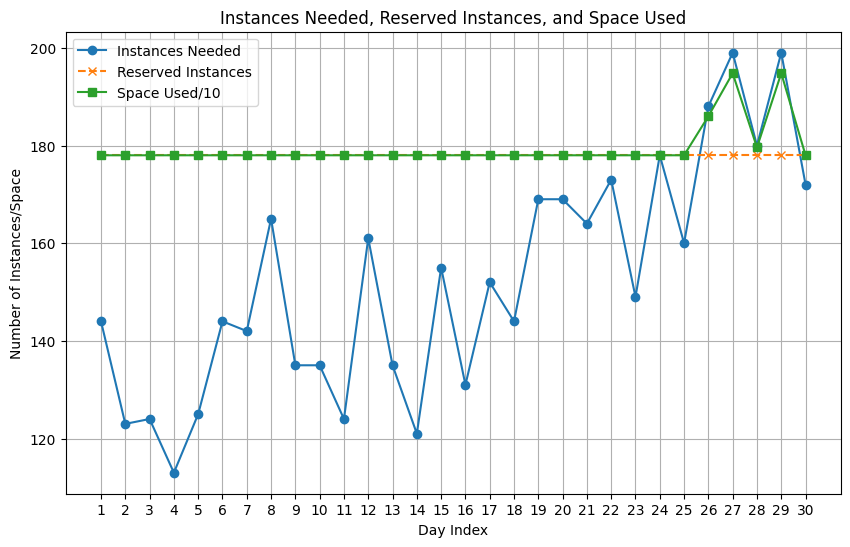

In [ ]:

# C_m = 10
# d_m = 0.2
# w = 0.6  # Weight parameter for trade-off between cost and space
# mdl_space = Model("monthlyspacecost_Optimization")
# Xrms = mdl_space.continuous_var(name="Reserved_Instances_monthly")
# Xodms = mdl_space.continuous_var_list(keys=range(30), name="On_Demand_Instanc

import matplotlib.pyplot as plt
Xod_values = [sol.get_value(Xodms[i]) for i in range(30)]
Xr_value = sol.get_value(Xrms)
Space_used_value= [(sol[Xrms]*10+sol.get_value(Xodms[i])*8)/10 for i in range(30) ]
print(Space_used_value)
plt.figure(figsize=(10, 6))

plt.plot(range(1, 31), data_s, marker='o', label='Instances Needed')

# Plot Reserved Instances
plt.plot(range(1, 31), [Xr_value] * 30, linestyle='--', marker='x', label='Reserved Instances')

# Plot Space Used
plt.plot(range(1, 31), Space_used_value, marker='s', label='Space Used/10')

plt.xlabel('Day Index')
plt.ylabel('Number of Instances/Space')
plt.title('Instances Needed, Reserved Instances, and Space Used')
plt.xticks(range(1, 31))
plt.legend()
plt.grid(True)

plt.show()


# **SPACE AND COST OPTIMISATION FOR CPU & GPU INTEGRATED PROBLEM**

**Integrate CPU GPU**

In [ ]:
from docplex.mp.model import Model

C_m = 100
d_m = 0.8
d_s=0.2
w = 0.9

CPU_no=5000
CPU_cost_od=C_m*(1+d_s)
CPU_cost_r=C_m*(1+d_s)*(1-d_m)

CPU_space_od= 8*(1-d_s)
CPU_space_r= 10*(1-d_s)

GPU_no=1000

GPU_cost_od=C_m*(1-d_s)
GPU_cost_r=C_m*(1-d_s)*(1-d_m)

GPU_space_od=8*(1+d_s)
GPU_space_r=10*(1+d_s)




#model_done
MDL_cg = Model("monthlyspacecost_Optimization_cpu_gpu")



Xrm_gpu= MDL_cg.continuous_var(name="XRMforGPU_used")
Xod_gpu = MDL_cg.continuous_var_list(keys=range(30), name="XodforGPU_used")
Xrm_cpu= MDL_cg.continuous_var(name="XRMforCPU_used")
Xod_cpu = MDL_cg.continuous_var_list(keys=range(30), name="XodforCPU_used")


GPUn= Xrm_gpu*GPU_space_r+MDL_cg.sum(Xod_gpu)*GPU_space_od  #total space
CPUn= Xrm_cpu*CPU_space_r+MDL_cg.sum(Xod_cpu)*CPU_space_od
CPUn= Xrm_cpu+MDL_cg.sum(Xod_cpu)

Xrms=Xrm_gpu+Xrm_cpu
Xodms=Xod_gpu+Xod_cpu


#constraintsdone
MDL_cg.add_constraint(GPUn <= GPU_no, ctname="GPU_contraint")   #max threshold constraint
MDL_cg.add_constraint(CPUn <= CPU_no, ctname="CPU_contraint")



total_cost= (30*Xrm_gpu*GPU_cost_r+MDL_cg.sum(Xod_gpu)*GPU_cost_od) +(30*Xrm_cpu*CPU_cost_r+MDL_cg.sum(Xod_cpu)*CPU_cost_od)

total_space=(30*Xrm_gpu*GPU_space_r+MDL_cg.sum(Xod_gpu)*GPU_space_od)+(30*Xrm_cpu*CPU_space_r+MDL_cg.sum(Xod_cpu)*CPU_space_od)

#budget constraint . constrint for combining , constraint for satisfy needs


#total_cost = 30 * Xrms * C_m * (1 - d_m) + MDL_cg.sum(Xodms) * C_m
#total_space = Xrms +MDL_cg.sum(Xodms)
MDL_cg.minimize(w * total_cost + (1 - w) * total_space)

# Assuming you have defined 'data' before this loop
for i, n in enumerate(data_s):
    MDL_cg.add_constraint(Xodms[i] + Xrms >= n, ctname=f"data_s_{i}")

max_cost = 500000
MDL_cg.add_constraint(total_cost <= max_cost, ctname="budget_constraint")

max_space = 50000
MDL_cg.add_constraint(total_space <= max_space, ctname="space_constraint")

sol = MDL_cg.solve()



if sol:
    print("Optimal Solution Found:")
    print(f"Total_sum: {sol.objective_value}")
    print(f"Reserved Instances: {sol[Xrms]}")
    print(f"GPUfor reserved: {sol[Xrm_gpu]}")
    print(f"GPUfor ondemand: {sum( [sol.get_value(Xod_gpu[i]) for i in range(30)])}")
    print(f"totalGPU:  {sol[Xrm_gpu]+sum( [sol.get_value(Xod_gpu[i]) for i in range(30)])}")
    print(f"CPUfor reserved: {sol[Xrm_cpu]}")
    print(f"CPU forondemand:{sum( [sol.get_value(Xod_cpu[i]) for i in range(30)])}")
    print(f"totalCPU:{sol[Xrm_cpu]+sum( [sol.get_value(Xod_cpu[i]) for i in range(30)])}")

    print(f"total_ondemand Instances: {sum( [sol.get_value(Xodms[i]) for i in range(30)])}")



    Total_cost=  (30*sol[Xrm_gpu]*GPU_cost_r + sum( [sol.get_value(Xod_gpu[i]) for i in range(30)])*GPU_cost_od) +(30*sol[Xrm_cpu]*CPU_cost_r +sum( [sol.get_value(Xod_cpu[i]) for i in range(30)])*CPU_cost_od)
    print(f"Total Cost: {Total_cost}")

    GPU_space = (30*sol[Xrm_gpu]*GPU_space_r+sum( [sol.get_value(Xod_gpu[i]) for i in range(30)])*GPU_space_od)
    print(f"GPU_space: {GPU_space}")
    CPU_space=(30*sol[Xrm_cpu]*CPU_space_r+sum( [sol.get_value(Xod_cpu[i]) for i in range(30)])*CPU_space_od)
    print(f"CPU_space: {CPU_space}")


    Space_used= (sol[Xrm_gpu]*GPU_space_r*30+sum( [sol.get_value(Xod_gpu[i]) for i in range(30)])*GPU_space_od)+(sol[Xrm_cpu]*CPU_space_r*30+sum( [sol.get_value(Xod_cpu[i]) for i in range(30)])*CPU_space_od)
    #print(f"Total Space Cost: {total_space_cost}")
    print(f"Space_used: {Space_used}")

    for i, day in enumerate(Xodms):
        print(f"On-Demand Instances for Day {i+1}: {sol.get_value(day)}")
else:
    print("No solution found.")


Optimal Solution Found:
Total_sum: 114766.76923076919
Reserved Instances: 181.55128205128204
GPUfor reserved: 50.25641025641027
GPUfor ondemand: 41.34615384615383
totalGPU:  91.6025641025641
CPUfor reserved: 131.29487179487177
CPU forondemand:0
totalCPU:131.29487179487177
total_ondemand Instances: 41.34615384615383
Total Cost: 121963.07692307688
GPU_space: 18489.230769230773
CPU_space: 31510.769230769223
Space_used: 50000.0
On-Demand Instances for Day 1: 0
On-Demand Instances for Day 2: 0
On-Demand Instances for Day 3: 0
On-Demand Instances for Day 4: 0
On-Demand Instances for Day 5: 0
On-Demand Instances for Day 6: 0
On-Demand Instances for Day 7: 0
On-Demand Instances for Day 8: 0
On-Demand Instances for Day 9: 0
On-Demand Instances for Day 10: 0
On-Demand Instances for Day 11: 0
On-Demand Instances for Day 12: 0
On-Demand Instances for Day 13: 0
On-Demand Instances for Day 14: 0
On-Demand Instances for Day 15: 0
On-Demand Instances for Day 16: 0
On-Demand Instances for Day 17: 0
On-

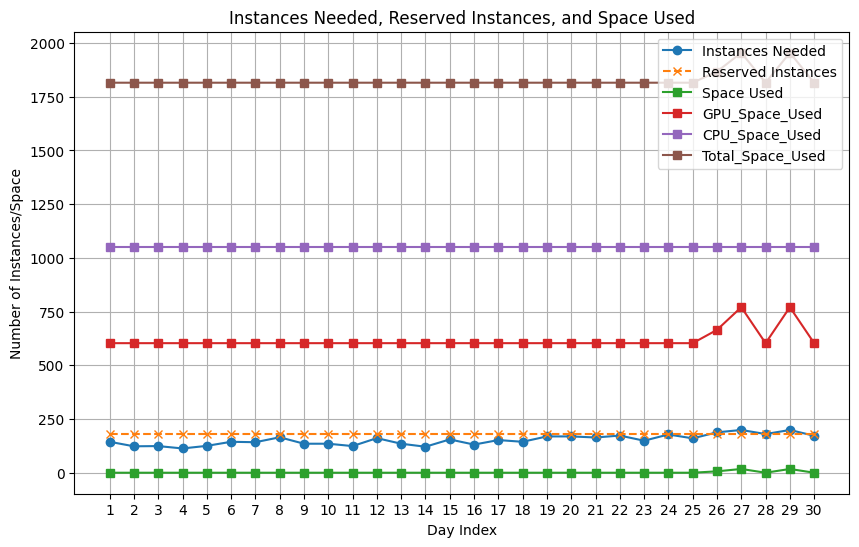

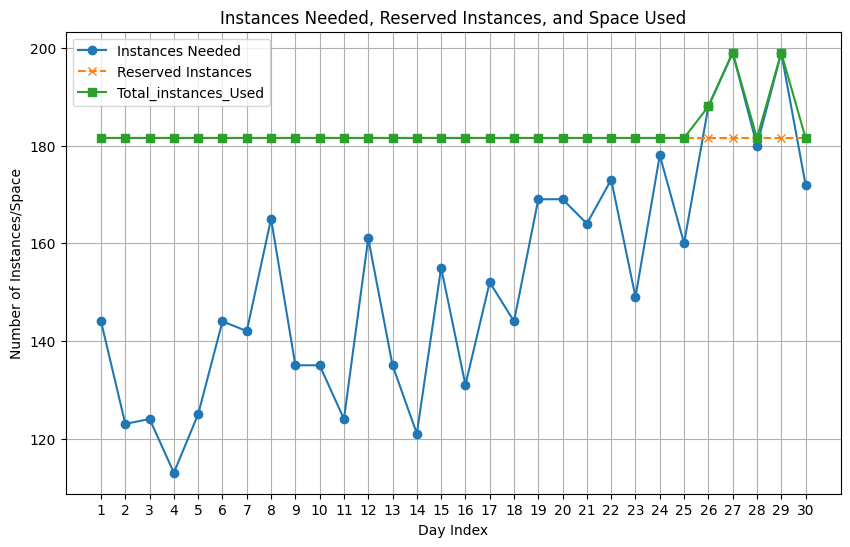

In [ ]:


import matplotlib.pyplot as plt
Xod_values = [sol.get_value(Xodms[i]) for i in range(30)]
Xr_value = sol.get_value(Xrms)
GPU_space_used=[sol.get_value(Xod_gpu[i])*GPU_space_od+sol[Xrm_gpu]*GPU_space_r for i in range(30)]
CPU_space_used=[sol.get_value(Xod_cpu[i])*CPU_space_od+sol[Xrm_cpu]*CPU_space_r for i in range(30)]

Space_used_value= [sol[Xrms]*10+sol.get_value(Xodms[i])*8 for i in range(30) ]

plt.figure(figsize=(10, 6))

plt.plot(range(1, 31), data_s, marker='o', label='Instances Needed')

# Plot Reserved Instances
plt.plot(range(1, 31), [Xr_value] * 30, linestyle='--', marker='x', label='Reserved Instances')

# Plot Space Used
plt.plot(range(1, 31), Xod_values, marker='s', label='Space Used')

plt.plot(range(1, 31), GPU_space_used, marker='s', label='GPU_Space_Used')

plt.plot(range(1, 31), CPU_space_used, marker='s', label='CPU_Space_Used')

plt.plot(range(1, 31), Space_used_value, marker='s', label='Total_Space_Used')


plt.xlabel('Day Index')
plt.ylabel('Number of Instances/Space')
plt.title('Instances Needed, Reserved Instances, and Space Used')
plt.xticks(range(1, 31))
plt.legend()
plt.grid(True)

plt.show()

# **Plot total instances**

total_instances_used=[sol.get_value(Xodms[i])+Xr_value for i in range(30)]

plt.figure(figsize=(10, 6))

plt.plot(range(1, 31), data_s, marker='o', label='Instances Needed')

# Plot Reserved Instances
plt.plot(range(1, 31), [Xr_value] * 30, linestyle='--', marker='x', label='Reserved Instances')

# Plot Space Used
plt.plot(range(1, 31), total_instances_used, marker='s', label='Total_instances_Used')


plt.xlabel('Day Index')
plt.ylabel('Number of Instances/Space')
plt.title('Instances Needed, Reserved Instances, and Space Used')
plt.xticks(range(1, 31))
plt.legend()
plt.grid(True)

plt.show()



# **TRY to include time of computation in the Problem **


In [ ]:
time_for_1instance_r_gpu=18
time_for_1instance_o_gpu=15
time_for_1instance_r_cpu=20
time_for_1instance_o_cpu=6

Fin_model= Model("final withtime ")

C_m = 100
d_m = 0.4
d_s=0.2
w = 0.6  # Weight parameter for trade-off between cost and space

CPU_no=5000
CPU_cost_od=C_m*(1+d_s)  #cost addiution for both if CPU
CPU_cost_r=C_m*(1+d_s)*(1-d_m)

CPU_space_od= 8*(1-d_s)
CPU_space_r= 10*(1-d_s)

#total_space = Xrms*10 + mdl_space.sum(Xodms)*8
GPU_no=1000

GPU_cost_od=C_m*(1-d_s)  #cost reduction for both if GPU
GPU_cost_r=C_m*(1-d_s)*(1-d_m)
#write per unit inly
GPU_space_od=8*(1+d_s)
GPU_space_r=10*(1+d_s)




Xrm_gpu=Fin_model.continuous_var(name="XRMforGPU_used")
Xod_gpu = Fin_model.continuous_var_list(keys=range(30), name="XodforGPU_used")
Xrm_cpu=Fin_model.continuous_var(name="XRMforCPU_used")
Xod_cpu = Fin_model.continuous_var_list(keys=range(30), name="XodforCPU_used")


GPUn= Xrm_gpu*GPU_space_r+Fin_model.sum(Xod_gpu)*GPU_space_od  #total space
CPUn= Xrm_cpu*CPU_space_r+Fin_model.sum(Xod_cpu)*CPU_space_od
CPUn= Xrm_cpu+Fin_model.sum(Xod_cpu)

Xrms=Xrm_gpu+Xrm_cpu
Xodms=Xod_gpu+Xod_cpu
#CPUn= MDL_cg.continuous_var(name="CPU_used")
#GPUn= MDL_cg.continuous_var(name="GPU_used")

#constraintsdone
Fin_model.add_constraint(GPUn <= GPU_no, ctname="GPU_contraint")   #max threshold constraint
Fin_model.add_constraint(CPUn <= CPU_no, ctname="CPU_contraint")



total_cost= (30*Xrm_gpu*GPU_cost_r+Fin_model.sum(Xod_gpu)*GPU_cost_od) +(30*Xrm_cpu*CPU_cost_r+Fin_model.sum(Xod_cpu)*CPU_cost_od)

total_space=(30*Xrm_gpu*GPU_space_r+Fin_model.sum(Xod_gpu)*GPU_space_od)+(30*Xrm_cpu*CPU_space_r+Fin_model.sum(Xod_cpu)*CPU_space_od)

total_time= (30*Xrm_gpu*time_for_1instance_r_gpu+Fin_model.sum(Xod_gpu)*time_for_1instance_o_gpu) +(30*Xrm_cpu*time_for_1instance_r_cpu+Fin_model.sum(Xod_cpu)*time_for_1instance_o_cpu)
#budget constraint . constrint for combining , constraint for satisfy needs

t=0.2
#total_cost = 30 * Xrms * C_m * (1 - d_m) + MDL_cg.sum(Xodms) * C_m
#total_space = Xrms +MDL_cg.sum(Xodms)
Fin_model.minimize( t*total_time + (1-t)*(w * total_cost + (1 - w) * total_space))

# Assuming you have defined 'data' before this loop
for i, n in enumerate(data_s):
    Fin_model.add_constraint(Xodms[i] + Xrms >= n, ctname=f"data_s_{i}")

max_cost = 500000
Fin_model.add_constraint(total_cost <= max_cost, ctname="budget_constraint")

max_space = 50000
Fin_model.add_constraint(total_space <= max_space, ctname="space_constraint")

sol = Fin_model.solve()


if sol:
    print("Optimal Solution Found:")
    print(f"Total_sum: {sol.objective_value}")
    print(f"Reserved Instances: {sol[Xrms]}")
    print(f"GPUfor reserved: {sol[Xrm_gpu]}")
    print(f"GPUfor ondemand: {sum( [sol.get_value(Xod_gpu[i]) for i in range(30)])}")
    print(f"totalGPU:  {sol[Xrm_gpu]+sum( [sol.get_value(Xod_gpu[i]) for i in range(30)])}")
    print(f"CPUfor reserved: {sol[Xrm_cpu]}")
    print(f"CPU forondemand:{sum( [sol.get_value(Xod_cpu[i]) for i in range(30)])}")
    print(f"totalCPU:{sol[Xrm_cpu]+sum( [sol.get_value(Xod_cpu[i]) for i in range(30)])}")

    print(f"total_ondemand Instances: {sum( [sol.get_value(Xodms[i]) for i in range(30)])}")

    Total_time=  (30*sol[Xrm_gpu]*time_for_1instance_r_gpu + sum( [sol.get_value(Xod_gpu[i]) for i in range(30)])*time_for_1instance_o_gpu) +(30*sol[Xrm_cpu]*time_for_1instance_r_cpu +sum( [sol.get_value(Xod_cpu[i]) for i in range(30)])*time_for_1instance_o_cpu)
    print(f"Total time(hrs): {Total_time/60}")

    Total_cost=  (30*sol[Xrm_gpu]*GPU_cost_r + sum( [sol.get_value(Xod_gpu[i]) for i in range(30)])*GPU_cost_od) +(30*sol[Xrm_cpu]*CPU_cost_r +sum( [sol.get_value(Xod_cpu[i]) for i in range(30)])*CPU_cost_od)
    print(f"Total Cost: {Total_cost}")

    GPU_space = (30*sol[Xrm_gpu]*GPU_space_r+sum( [sol.get_value(Xod_gpu[i]) for i in range(30)])*GPU_space_od)
    print(f"GPU_space: {GPU_space}")
    CPU_space=(30*sol[Xrm_cpu]*CPU_space_r+sum( [sol.get_value(Xod_cpu[i]) for i in range(30)])*CPU_space_od)
    print(f"CPU_space: {CPU_space}")


    Space_used= (sol[Xrm_gpu]*GPU_space_r*30+sum( [sol.get_value(Xod_gpu[i]) for i in range(30)])*GPU_space_od)+(30*sol[Xrm_cpu]*CPU_space_r+sum( [sol.get_value(Xod_cpu[i]) for i in range(30)])*CPU_space_od)
    print(f"Total Space Cost: {Spacce_used}")

    for i, day in enumerate(Xodms):
        print(f"On-Demand Instances for Day {i+1}: {sol.get_value(day)}")
else:
    print("No solution found.")

Optimal Solution Found:
Total_sum: 209171.728
Reserved Instances: 178.0
GPUfor reserved: 40.1333333333334
GPUfor ondemand: 53.99999999999993
totalGPU:  94.13333333333333
CPUfor reserved: 137.86666666666662
CPU forondemand:0
totalCPU:137.86666666666662
total_ondemand Instances: 53.99999999999993
Total time(hrs): 1753.3666666666666
Total Cost: 359903.99999999994
GPU_space: 14966.400000000021
CPU_space: 33087.999999999985
Total Space Cost: 5442.0
On-Demand Instances for Day 1: 0
On-Demand Instances for Day 2: 0
On-Demand Instances for Day 3: 0
On-Demand Instances for Day 4: 0
On-Demand Instances for Day 5: 0
On-Demand Instances for Day 6: 0
On-Demand Instances for Day 7: 0
On-Demand Instances for Day 8: 0
On-Demand Instances for Day 9: 0
On-Demand Instances for Day 10: 0
On-Demand Instances for Day 11: 0
On-Demand Instances for Day 12: 0
On-Demand Instances for Day 13: 0
On-Demand Instances for Day 14: 0
On-Demand Instances for Day 15: 0
On-Demand Instances for Day 16: 0
On-Demand Instanc

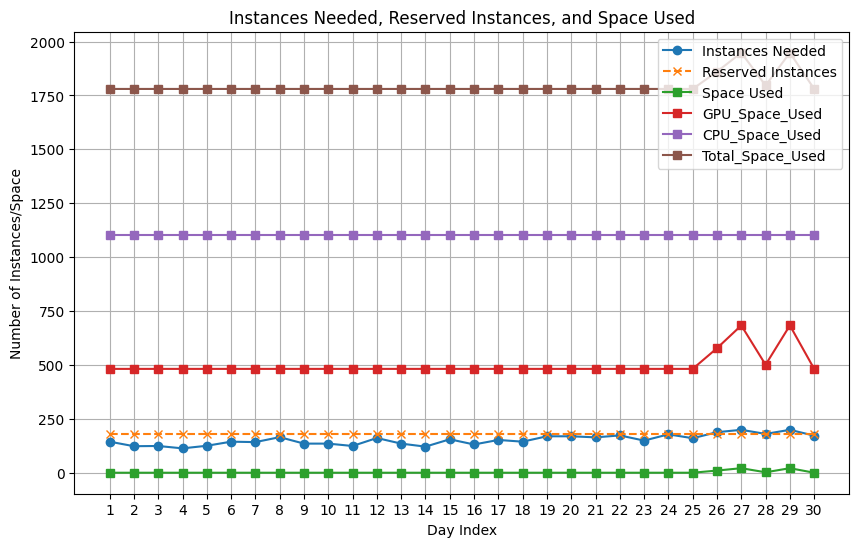

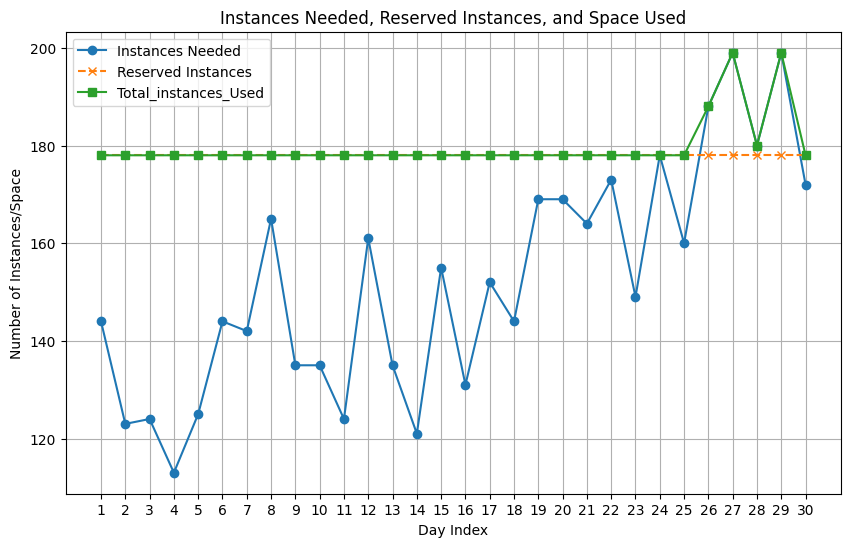

In [ ]:


import matplotlib.pyplot as plt
Xod_values = [sol.get_value(Xodms[i]) for i in range(30)]
Xr_value = sol.get_value(Xrms)
GPU_space_used=[sol.get_value(Xod_gpu[i])*GPU_space_od+sol[Xrm_gpu]*GPU_space_r for i in range(30)]
CPU_space_used=[sol.get_value(Xod_cpu[i])*CPU_space_od+sol[Xrm_cpu]*CPU_space_r for i in range(30)]

Space_used_value= [sol[Xrms]*10+sol.get_value(Xodms[i])*8 for i in range(30) ]

plt.figure(figsize=(10, 6))

plt.plot(range(1, 31), data_s, marker='o', label='Instances Needed')

# Plot Reserved Instances
plt.plot(range(1, 31), [Xr_value] * 30, linestyle='--', marker='x', label='Reserved Instances')

# Plot Space Used
plt.plot(range(1, 31), Xod_values, marker='s', label='Space Used')

plt.plot(range(1, 31), GPU_space_used, marker='s', label='GPU_Space_Used')

plt.plot(range(1, 31), CPU_space_used, marker='s', label='CPU_Space_Used')

plt.plot(range(1, 31), Space_used_value, marker='s', label='Total_Space_Used')


plt.xlabel('Day Index')
plt.ylabel('Number of Instances/Space')
plt.title('Instances Needed, Reserved Instances, and Space Used')
plt.xticks(range(1, 31))
plt.legend()
plt.grid(True)

plt.show()

# **Plot total instances**

total_instances_used=[sol.get_value(Xodms[i])+Xr_value for i in range(30)]

plt.figure(figsize=(10, 6))

plt.plot(range(1, 31), data_s, marker='o', label='Instances Needed')

# Plot Reserved Instances
plt.plot(range(1, 31), [Xr_value] * 30, linestyle='--', marker='x', label='Reserved Instances')

# Plot Space Used
plt.plot(range(1, 31), total_instances_used, marker='s', label='Total_instances_Used')


plt.xlabel('Day Index')
plt.ylabel('Number of Instances/Space')
plt.title('Instances Needed, Reserved Instances, and Space Used')
plt.xticks(range(1, 31))
plt.legend()
plt.grid(True)

plt.show()

